In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

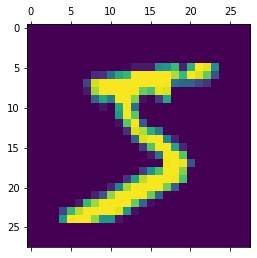

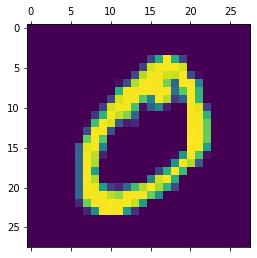

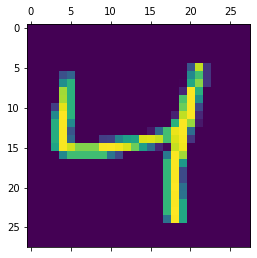

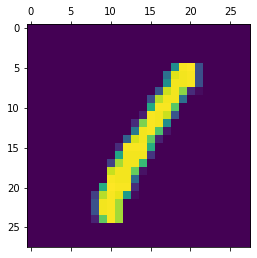

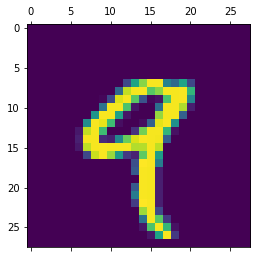

In [7]:
for i in range(0,5):
    plt.matshow(X_train[i])

In [8]:
for i in range(0,5):
    print(y_train[i])

5
0
4
1
9


In [9]:
X_train = X_train / 255
X_test = X_test / 255

## Neural Network with no hidden layers

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4627 - accuracy: 0.8810
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3035 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2660 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2622 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2579 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9260


[0.26756489276885986, 0.9259999990463257]

In [12]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 902us/step


array([2.8573030e-03, 3.3925446e-08, 1.5819238e-02, 9.7011119e-01,
       1.8233168e-03, 1.7113827e-01, 7.7162831e-08, 9.9989039e-01,
       1.1862978e-01, 7.6343554e-01], dtype=float32)

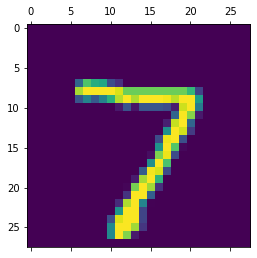

In [13]:
plt.matshow(X_test[0])

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

#### Confusion Matrix

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    2,    2,    0,    9,   12,    3,    2,    1],
       [   0, 1106,    3,    2,    0,    1,    5,    2,   16,    0],
       [   2,    9,  914,   15,    7,    7,   14,   10,   51,    3],
       [   1,    0,   15,  912,    0,   27,    3,   11,   30,   11],
       [   1,    1,    4,    2,  916,    0,   13,    4,   11,   30],
       [   6,    3,    1,   22,    9,  786,   16,    7,   35,    7],
       [   6,    3,    8,    1,    7,   13,  915,    2,    3,    0],
       [   1,    6,   22,    3,    6,    1,    0,  949,    4,   36],
       [   3,    7,    5,   16,    9,   18,    7,   10,  889,   10],
       [   9,    8,    1,    7,   26,    6,    0,   17,   11,  924]])>

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

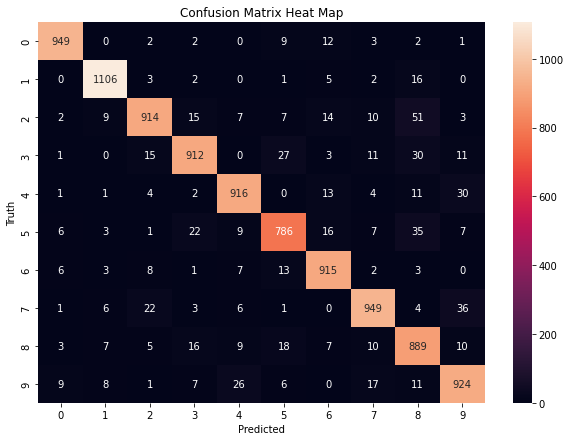

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Heat Map")

## Neural Network with Hidden Layer

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2707 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0432 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9742


[0.09313679486513138, 0.9742000102996826]

313/313 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix Heat Map')

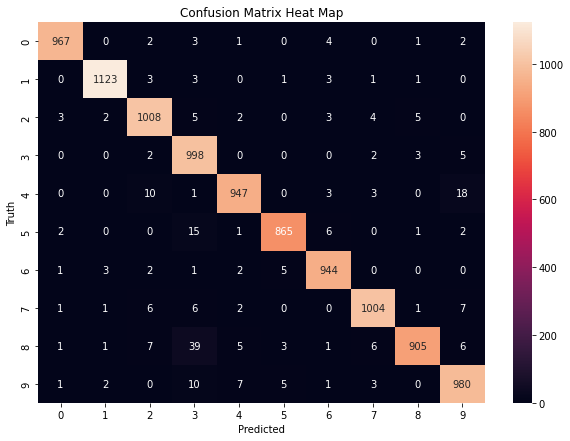

In [21]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Heat Map")

### Neural Network with hidden layer has shown much better accuracy (97.42%) as compared to Neural Network with no hidden layers (92.6%).